# Contents
1. [Data Cleaning](#1.-Data-Cleaning)
2. [EDA](#2.-EDA)
3. [Model Prep](#3.-Model-Prep)
4. [NLP Exploration](#4.-NLP-Exploration)
5. [Final Cleanup Before Merging with Weather](#5.-Final-Cleanup-Before-Merge)

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# python magic to display matplolib plots in the notebook
%matplotlib inline

## 1. Data Cleaning

In [2]:
# import raw tweets dataframe
df = pd.read_csv('./data/tweets_scrape_first_df.csv')

#### Initial Inspection

In [3]:
# check the first five rows
df.head()

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
0,267716394043465728,2012-11-11 14:52:16,NaN,False,False,NaN,0.0,0.0,0.0,ConEd : NY Sandy power outages slip; costs...,/RealJezzy/status/267716394043465728,504279674.0,RealJezzy
1,298660085255770112,2013-02-05 00:11:27,NaN,False,False,NaN,0.0,0.0,0.0,@ ConEdison \n Power outage in queens,/meirBGNY/status/298660085255770112,909594764.0,meirBGNY
2,21860028236,2010-08-22 17:33:44,NaN,False,False,NaN,0.0,0.0,0.0,Power outage in the Whitestone section of Q...,/olgushka1/status/21860028236,68886571.0,olgushka1
3,1069021302667833344,2018-12-01 19:11:54,NaN,False,False,NaN,0.0,1.0,0.0,about that power outage that is now over.....,/jimcasale/status/1069021302667833344,12393522.0,jimcasale
4,767077182124486656,2016-08-20 15:13:46,NaN,False,False,NaN,3.0,0.0,7.0,.@ConEdison is responding to a power outag...,/NotifyNYC/status/767077182124486656,16145875.0,NotifyNYC


In [4]:
# check all column names
df.columns

Index(['ID', 'datetime', 'has_media', 'is_reply', 'is_retweet', 'medias',
       'nbr_favorite', 'nbr_reply', 'nbr_retweet', 'text', 'url', 'user_id',
       'usernameTweet'],
      dtype='object')

In [5]:
# look at some basic dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4375 entries, 0 to 4374
Data columns (total 13 columns):
ID               4375 non-null object
datetime         4375 non-null object
has_media        150 non-null object
is_reply         4375 non-null object
is_retweet       4374 non-null object
medias           149 non-null object
nbr_favorite     4374 non-null float64
nbr_reply        4374 non-null float64
nbr_retweet      4374 non-null float64
text             4374 non-null object
url              4373 non-null object
user_id          4373 non-null float64
usernameTweet    4373 non-null object
dtypes: float64(4), object(9)
memory usage: 444.4+ KB


In [6]:
df.describe()

,nbr_favorite,nbr_reply,nbr_retweet,user_id
count,4374.000000,4374.000000,4374.000000,4.373000e+03
mean,0.941015,0.368999,1.636488,1.905119e+16
std,14.724863,2.857402,6.094350,1.283920e+17
min,0.000000,0.000000,0.000000,4.180000e+02
25%,0.000000,0.000000,0.000000,1.673217e+07
50%,0.000000,0.000000,0.000000,6.350043e+07
75%,0.000000,0.000000,1.000000,3.748954e+08
max,956.000000,163.000000,271.000000,1.104817e+18


In [7]:
# inspect datatypes
df.dtypes

ID                object
datetime          object
has_media         object
is_reply          object
is_retweet        object
medias            object
nbr_favorite     float64
nbr_reply        float64
nbr_retweet      float64
text              object
url               object
user_id          float64
usernameTweet     object
dtype: object

#### Converting 'datetime' column to datetime format

In [8]:
# converting the datetime column to datetime format
# won't work because there there not all of the cells are formatted correctly

## pd.to_datetime(df['datetime']).head()
## returns 'ValueError: month must be in 1..12'

In [9]:
# locate the datetime value that is not in the correct format
for i in df.datetime:
    if i[5:7] not in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
        print(i)

/Maggie4Obama/status/108170030474203136


In [10]:
# look at the row
df[df.datetime == '/Maggie4Obama/status/108170030474203136']

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
2808,@ConEdison Why are there no updates regarding...,/Maggie4Obama/status/108170030474203136,20567184,Maggie4Obama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# inspect the item
df.iloc[2808]

ID               @ConEdison  Why are there no updates regarding...
datetime                   /Maggie4Obama/status/108170030474203136
has_media                                                 20567184
is_reply                                              Maggie4Obama
is_retweet                                                     NaN
medias                                                         NaN
nbr_favorite                                                   NaN
nbr_reply                                                      NaN
nbr_retweet                                                    NaN
text                                                           NaN
url                                                            NaN
user_id                                                        NaN
usernameTweet                                                  NaN
Name: 2808, dtype: object

In [12]:
# drop that row since it is mostly bad data
df.drop(index=2808, inplace=True)

In [13]:
# try converting the 'datetime' column to datetime again
df.datetime = pd.to_datetime(df.datetime)

In [96]:
print(min(df.datetime))
print(max(df.datetime))

2007-07-20 11:47:44
2019-04-18 11:15:09


In [14]:
# check that it worked
df.dtypes

ID                       object
datetime         datetime64[ns]
has_media                object
is_reply                 object
is_retweet               object
medias                   object
nbr_favorite            float64
nbr_reply               float64
nbr_retweet             float64
text                     object
url                      object
user_id                 float64
usernameTweet            object
dtype: object

In [15]:
# sort the dataframe so that it is in chronological order
df.sort_values('datetime', inplace=True)

# and reset the index
df.reset_index(inplace=True)

#### Addressing Null Values

In [16]:
# check nulls
df.isnull().sum()

index               0
ID                  0
datetime            0
has_media        4225
is_reply            0
is_retweet          0
medias           4225
nbr_favorite        0
nbr_reply           0
nbr_retweet         0
text                0
url                 1
user_id             1
usernameTweet       1
dtype: int64

In [17]:
# impute 'no media' for the null media columns
df['has_media'] = df.has_media.fillna('no media')
df['medias'] = df.has_media.fillna('no media')
df.isnull().sum()

index            0
ID               0
datetime         0
has_media        0
is_reply         0
is_retweet       0
medias           0
nbr_favorite     0
nbr_reply        0
nbr_retweet      0
text             0
url              1
user_id          1
usernameTweet    1
dtype: int64

In [18]:
#check out the null url
df[df.url.isnull()]

,index,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
656,2807,108170030474203136,2011-08-29 09:31:59,no media,False,False,no media,0.0,0.0,0.0,TomSmolka Tom Smolka,NaN,NaN,NaN


In [19]:
# drop that row since it is mostly bad data
# and also addresses the nulls for user_id and usernameTweet
df.drop(index=2807, inplace=True)

In [20]:
# check that all the nulls have been addressed
df.isnull().sum()

index            0
ID               0
datetime         0
has_media        0
is_reply         0
is_retweet       0
medias           0
nbr_favorite     0
nbr_reply        0
nbr_retweet      0
text             0
url              1
user_id          1
usernameTweet    1
dtype: int64

## 2. EDA

#### Duplicate Values
We want to look at how many duplicate values are present in each column, to get a sense of the diversity of the collection of tweets. We don't want too many duplicate values.

/Users/kevinc/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


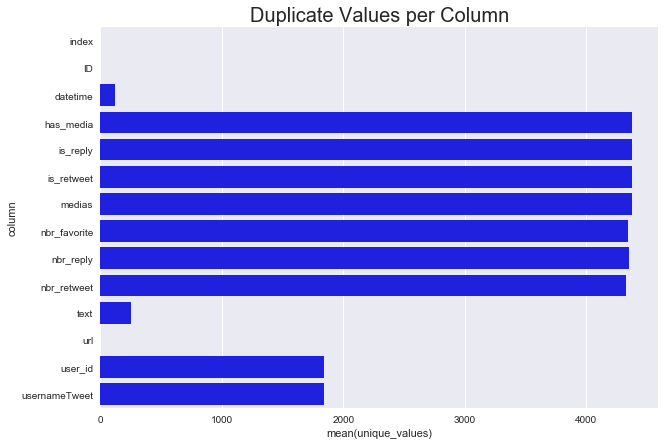

In [21]:
# create a dataframe of all duplicate values
unique = []
for i in df.columns:
    uniques = {}
    uniques['column'] = i 
    uniques['unique_values'] = len(df) - df[i].nunique()
    unique.append(uniques)
unique_df = pd.DataFrame(unique)

# plot the dataframe
plt.figure(figsize=(10, 7))
sns.barplot(x = unique_df.unique_values, 
            y = unique_df.column,
            color = 'b')
plt.title('Duplicate Values per Column', fontsize=20);

In [22]:
df.user_id.nunique()

2533

Columns that contain mainly duplicates turn out to be unsurprising. They are either binary distributions (like 'is_reply') or mostly zeroes (like 'nbr_retweet').

The primary insight from this is that even though we have 4,373 tweets, we have only 2,533 unique authors of the tweets. We looked into this further:

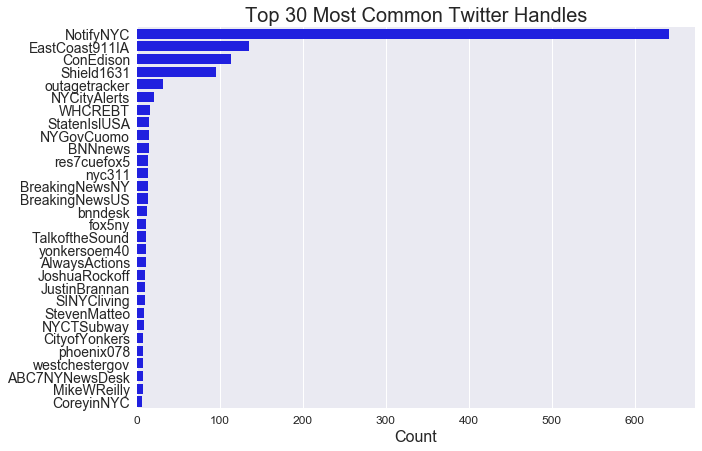

In [23]:
common_handles = zip(df.usernameTweet.value_counts()[:30].index.values, df.usernameTweet.value_counts()[:30].values)
x = pd.DataFrame(common_handles, columns=['handle', 'count'])


plt.figure(figsize=(10, 7))
sns.barplot(y = x['handle'], 
            x = x['count'],
            color = 'b')
plt.title('Top 30 Most Common Twitter Handles', fontsize=20)
plt.xlabel('Count', fontsize=16)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks(fontsize=12);

In [24]:
len(df[df.usernameTweet == 'NotifyNYC'])

641

#### Considering The Most Common Twitter Authors (Handles)
There are many handles that have multiple tweets. These include official handles and news organizations. The most common handle, by far, is @NotifyNYC, with 641 tweets.

We will want to consider using some of these as target indicators, particularly those that are official handles that are sharing information the utility would likely already know about.  

We will also want to consider extracting these from the dataframe before parsing for language, since they're likely to bias any model looking for common language (i.e. many of the tweets from NotifyNYC follow a format along the lines of "@Conedison is responding to a power outage in {zip-code}).

In [25]:
df[df.usernameTweet == 'NotifyNYC'].head(1)

,index,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
8,1959,4893616711,2009-10-15 13:21:40,no media,False,False,no media,0.0,0.0,0.0,ConEd responding to a power outage in the...,/NotifyNYC/status/4893616711,16145875.0,NotifyNYC


It turns out that many groups copy and share tweets from @NotifyNYC. Of the tweets collected, almost all of the tweets from two of the top three handles after @NotifyNYC, @EastCoast911A and @Shield1631, are copies of NotifyNYC tweets. 

*Note: We discovered at this time that the 'is_retweet' column had no positive values, possibly due to limitations with the scraper, so we were unable to leverage that column as a means to remove duplicates.*

In [26]:
df[df.usernameTweet == 'EastCoast911IA'][:1]

,index,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
3003,1160,739603458937004032,2016-06-05 19:43:00,no media,False,False,no media,0.0,0.0,0.0,NotifyNYC: .ConEdison is responding to a powe...,/EastCoast911IA/status/739603458937004032,2.778990e+09,EastCoast911IA


In [27]:
df[df.usernameTweet == 'Shield1631'].head(1)

,index,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
3412,2594,868210315300933637,2017-05-26 17:00:44,no media,False,False,no media,1.0,0.0,1.0,NYC: ConED reporting a large power outage...,/Shield1631/status/868210315300933637,3.493897e+09,Shield1631


These are duplicate tweets, so we want to exclude them from our analysis. Below we accomplish this using various masks to identify the retweets and systematically pair down the dataframe. 

#### Removing @NotifyNYC Tweets (641 tweets)

In [28]:
# first, extract NotifyNYC so that we can use those tweets later, if we need them
df_with_only_NotifyNYC = df[df.usernameTweet == 'NotifyNYC']

# save that to a csv
df_with_only_NotifyNYC.to_csv('NotifyNYC_tweets.csv')

# and create a dataframe without NotifyNYC that can be paired down
df_without_NotifyNYC = df[df.usernameTweet != 'NotifyNYC']

# print out the top twitter handles after removing the retweets
print(df_without_NotifyNYC.usernameTweet.value_counts()[:5])

EastCoast911IA    135
ConEdison         113
Shield1631         95
outagetracker      31
NYCityAlerts       20
Name: usernameTweet, dtype: int64


#### Removing Tweets that contain the term 'NotifyNYC' (361 tweets)

In [29]:
# create a mask to identify "retweets" of NotifyNYC
retweets_notify = df_without_NotifyNYC.text.str.contains('NotifyNYC')

# print the number of tweets in the mask
print(f'{len(df_without_NotifyNYC[retweets_notify])} retweets in the mask')
print('')

# save a new dataframe that excludes these tweets
df_without_notify_retweets = df_without_NotifyNYC[~retweets_notify]

# print out the top twitter handles after removing the retweets
print(df_without_notify_retweets.usernameTweet.value_counts()[:5])

361 retweets in the mask

ConEdison        113
Shield1631        95
outagetracker     28
NYCityAlerts      19
BNNnews           14
Name: usernameTweet, dtype: int64


#### Removing @Shield1631 Tweets (95 copies of @NotifyNYC tweets)

In [30]:
# create a mask to identify "retweets" of NotifyNYC
# noting that every 'Shild1631' tweet in our dataframe was a NotifyNYC retweet
retweets_notify = df_without_NotifyNYC.usernameTweet == 'Shield1631'

# print the number of tweets in the mask
print(f'{len(df_without_notify_retweets[retweets_notify])} retweets in the mask')
print('')

# save a new dataframe that excludes these tweets
df_without_notify_retweets = df_without_notify_retweets[~retweets_notify]

# print out the top twitter handles after removing the retweets
print(df_without_notify_retweets.usernameTweet.value_counts()[:5])

95 retweets in the mask

ConEdison        113
outagetracker     28
NYCityAlerts      19
BNNnews           14
NYGovCuomo        14
Name: usernameTweet, dtype: int64


/Users/kevinc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/kevinc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [91]:
#### Removing tweets that contain the exact same language as NotifyNYC (57 tweets)

In [31]:
# create a mask to identify "retweets" of NotifyNYC
# taking advantage of the strange character spacing in some of the tweets
retweets_notify = df_without_notify_retweets.text.str.contains('is responding to a  p')

# print the number of tweets in the mask
print(f'{len(df_without_notify_retweets[retweets_notify])} retweets in the mask')
print('')

# save a new dataframe that excludes these tweets
df_without_notify_retweets = df_without_notify_retweets[~retweets_notify]

# print out the top twitter handles after removing the retweets
print(df_without_notify_retweets.usernameTweet.value_counts()[:5])

57 retweets in the mask

ConEdison        113
outagetracker     28
NYCityAlerts      19
BNNnews           14
NYGovCuomo        14
Name: usernameTweet, dtype: int64


In [95]:
print(f'NotifyNYC-related tweets removed: {len(df) - len(df_without_notify_retweets)}')

NotifyNYC-related tweets removed: 1154


# 3. Model Prep

Before we can model with the language in the tweets, we need to clean the tweets up and convert them into numbers the models will be able to process.  To do so, we employed functions to convert the text into tokens and break down the words into basic elements. 

#### Removing stopwords and common meaningless terms

In [33]:
# import libraries
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords
import re

In [34]:
# Define a function to convert a tweet to a string of words
def tweets_to_words(raw_tweets):
    
    # 1. Remove HTML.
    post_text = BeautifulSoup(raw_tweets).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", post_text)
    
    # 3. Split into individual words.
    words = letters_only.split()
        
    # 4. Convert the stop words to a set, since searching a 
    # searching a set in Python is much faster than searching a list.
    stops = set(stopwords.words('english')) 
    extra = ['http','https','www','com','@','...','…', 'bit', 'ly', 'rt']
    # 5. Remove stop words.
    meaningful_words = [word for word in words if not word in stops and word not in extra]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [35]:
# apply the tweet_to_words function to the raw text tweets
# and save the results to a new column called 'regex_clean_tweets'
df_without_notify_retweets['regex_clean_tweets'] = df_without_notify_retweets.text.apply(tweets_to_words)

In [36]:
# confirm that the column was created
df_without_notify_retweets.regex_clean_tweets[0]

'upset power outage Jango ConEd needs get act together Always'

#### Lemmatization

In [37]:
# import tokenizer and stemmer
from nltk import word_tokenize, TweetTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [38]:
# define a function that takes in a tweet
# and tokenizes and stems that tweet
def stem_tweet(tweet):    
    stm = PorterStemmer()
    tokenized = word_tokenize(tweet)
    stem_tokes = []
    for toke in tokenized:
        stem_tokes.append(stm.stem(toke))
    stem_tokes

    comb = ''
    for stemmed in stem_tokes:
        comb += stemmed + ' '
    return comb

# define a function that takes in a tweet
# and tweet_tokenizes and lemmatizes that tweet
def lem_tweet(tweet):    
    lem = WordNetLemmatizer()
    tokenizer = TweetTokenizer()
    tokenized = tokenizer.tokenize(tweet)
    lemmed_tokes = []
    for toke in tokenized:
        lemmed_tokes.append(lem.lemmatize(toke))
    lemmed_tokes

    comb = ''
    for lemmed in lemmed_tokes:
        comb += lemmed + ' '
    return comb

In [39]:
# check that the function works
lem_tweet(df_without_notify_retweets.regex_clean_tweets[3])

'Neighborhood power outage Goddamn ConEd This around rivington st '

In [40]:
# create a new column by applying the function to the title column
df_without_notify_retweets['lemmed_tweet'] = df_without_notify_retweets.regex_clean_tweets.apply(lem_tweet)

In [41]:
# confirm that the column was created
df_without_notify_retweets.lemmed_tweet[0]

'upset power outage Jango ConEd need get act together Always '

In [42]:
# uncomment to save to csv
#df_without_notify_retweets.to_csv('working_df_without_retweets.csv')

#### Word Vectorization (Unprocessed Tweets)

In [43]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
# Instantiate
cv = CountVectorizer(stop_words='english', 
                     ngram_range=(1,1)
                    )

In [45]:
# Fit and Transform
sparse_df_unlemmed = cv.fit_transform(df_without_notify_retweets.text)

In [46]:
# Check the appearance of the word matrix
dense_df_unlemmed = pd.DataFrame(sparse_df_unlemmed.todense(), columns=cv.get_feature_names())
dense_df_unlemmed.head()

,00,000,0004cd37823361e17f570,0025,004681,0075,008,00am,00pm,01,...,zq1l1q,zq77qw,zqccse,zrhytqylft,zup9nhrybuektc1lcewgbpjqjpebeptl,zup9nhrybuhm1ks2tvqbgrdi67_ocwsu,zuqbnywg1dl,zxutv,zzwxbkvgxy,うちはまだ停電してないだけましらしい
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Check the length
len(cv.get_feature_names())

6776

#### Word Vectorization (Processed Tweets)

In [48]:
# Instantiate a CountVectorizer
cv = CountVectorizer(stop_words='english', 
                     ngram_range=(1,1)
                    )

In [49]:
# Fit and Transform the lemmatized tweets
sparse_df_lemmed = cv.fit_transform(df_without_notify_retweets.lemmed_tweet)

In [50]:
# Check the appearance of the word matrix
dense_df_lemmed = pd.DataFrame(sparse_df_lemmed.todense(), columns=cv.get_feature_names())
dense_df_lemmed.head()

,aaa,aaaa,aaaaaaand,aacel,abb,abbgroupnews,abc,abiwrightny,able,abqxzo,...,zup,zuqbnywg,zv,zwk,zxutv,zy,zyqz,zysed,zyzm,zzwxbkvgxy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Check the number of features
len(cv.get_feature_names())

5752

## 4. NLP Exploration
In order to better understand the language in our collection of tweets, we used Natural Language Processing to explore certain aspects of the corpus. In particular, we considered looking at the nouns, proper nouns, and geopolitical entities (mainly locations) contained in our tweets. The goal of the exploration was to determine if certain aspects of the language could be used, in modeling, to improve the accuracy of our predictions.

In [52]:
# import spaCy
import spacy
nlp = spacy.load('en')

#### Extract and Visualize Common Nouns from Tweets

In [53]:
# define a function to extract a tweet's nouns 
# and return them in a single string,
# so that the string can then be added back into the dataframe

def extract_NOUN(tweet):
    doc = nlp(tweet)
    NOUNS = []
    for token in doc:
        if token.pos_ == 'NOUN':
            NOUNS.append(str(token))   
    #print(NOUNS)
    comb = ''
    for token in NOUNS:
        comb += token + ' '
    return comb

In [54]:
# test out the function to confirm that it extracts all of the nouns
print(df_without_notify_retweets.lemmed_tweet[0])
extract_NOUN(df_without_notify_retweets.lemmed_tweet[0])

upset power outage Jango ConEd need get act together Always 


'power outage act '

In [55]:
# apply the function to every lemmed tweet to create a new 'nouns' column
df_without_notify_retweets['nouns'] = df_without_notify_retweets.lemmed_tweet.apply(extract_NOUN)

# confirm the new column was created
df_without_notify_retweets.nouns[0]

'power outage act '

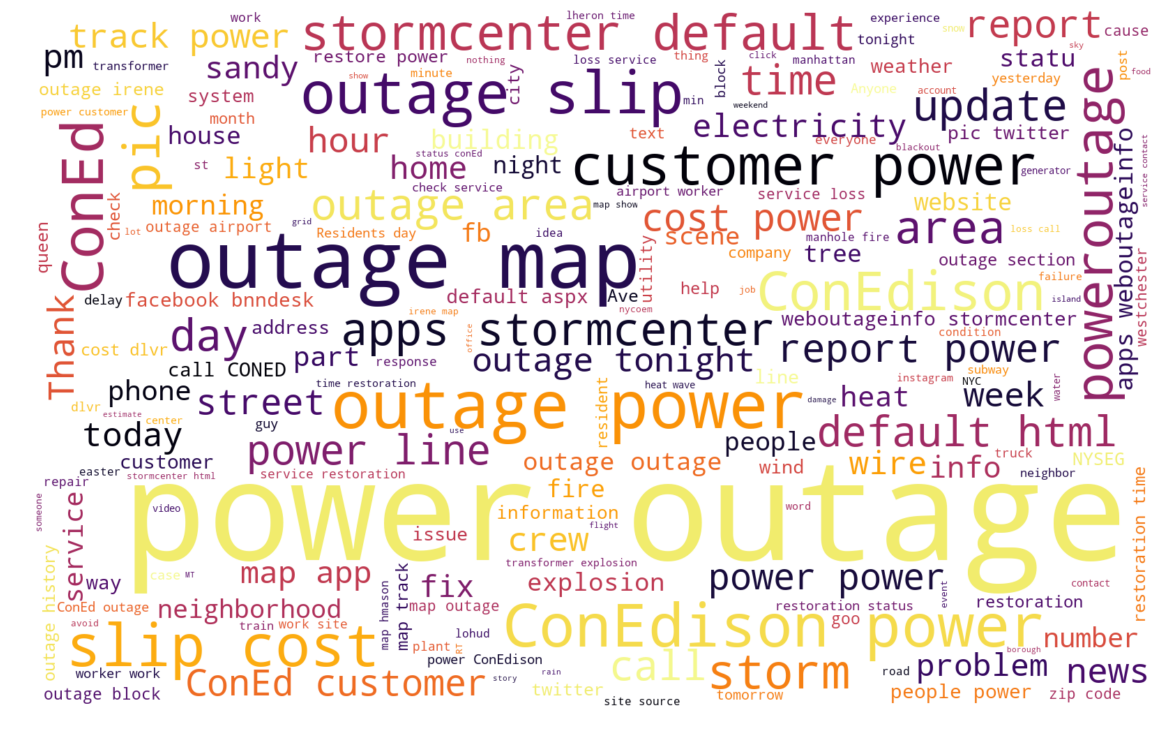

In [56]:
# return a word cloud of NOUNS 
NOUNS = df_without_notify_retweets.nouns
NOUNS_string = []
for i in NOUNS:
    NOUNS_string.append(i)
NOUN_string = pd.Series(NOUNS).str.cat(sep=' ')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(width=1600, height=1000,
                      max_font_size=200,
                      colormap='inferno', 
                      background_color='white').generate(NOUN_string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

#### Extract and Visualize Proper Nouns from Tweets

In [57]:
# define a function to extract a tweet's proper nouns 
# and return them in a single string,
# so that the string can then be added back into the dataframe

def extract_PROPN(tweet):
    doc = nlp(tweet)
    PROPN = []
    for token in doc:
        if token.pos_ == 'PROPN':
            PROPN.append(str(token))   
    #print(PROPN)
    comb = ''
    for token in PROPN:
        comb += token + ' '
    return comb

In [58]:
# test the function
extract_PROPN(df_without_notify_retweets.lemmed_tweet[0])

'Jango ConEd '

In [59]:
# apply the function to every lemmed tweet to create a new 'proper_nouns' column
df_without_notify_retweets['proper_nouns'] = df_without_notify_retweets.lemmed_tweet.apply(extract_PROPN)

# check that the column was created
df_without_notify_retweets.proper_nouns[0]

'Jango ConEd '

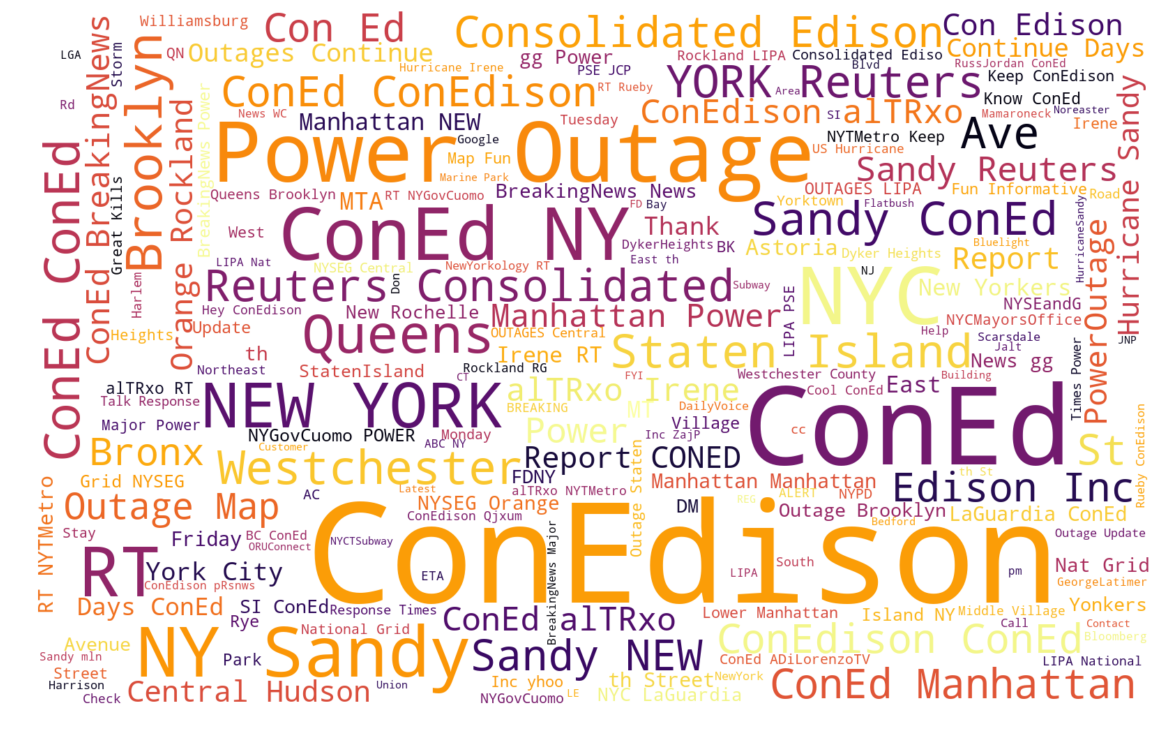

In [60]:
# returns a word cloud of PROPER NOUNS 
PROPER_NOUNS = df_without_notify_retweets.proper_nouns
PROPER_NOUNS_string = []
# iterates over values assigned to notify_nyc
for i in PROPER_NOUNS:
    PROPER_NOUNS_string.append(i)
PROPER_NOUN_string = pd.Series(PROPER_NOUNS).str.cat(sep=' ')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(width=1600, height=1000,
                      max_font_size=200,
                      colormap='inferno', 
                      background_color='white').generate(PROPER_NOUN_string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

#### Named-Entity-Recognition to Extract and Visualize Common Geopolitical Entities from Tweets

In [61]:
# define a function that takes in a tweet and returns a single string
# that contains only the Geopolitical Entities from that tweet
def extract_GPE(tweet):
    doc = nlp(tweet)
    GPE = []
    for ent in doc.ents:
        if ent.label_ == 'GPE':
            GPE.append(str(ent.text))   
    #print(GPE)
    comb = ''
    for token in GPE:
        comb += token + ' '
    return comb

In [62]:
# apply the function to every lemmed tweet to create a new 'geopolitical_ents' column
df_without_notify_retweets['geopolitical_ents'] = df_without_notify_retweets.lemmed_tweet.apply(extract_GPE)

In [63]:
# check that the column was added
df_without_notify_retweets[df_without_notify_retweets.geopolitical_ents != ''].geopolitical_ents[:1]

9    Brooklyn 
Name: geopolitical_ents, dtype: object

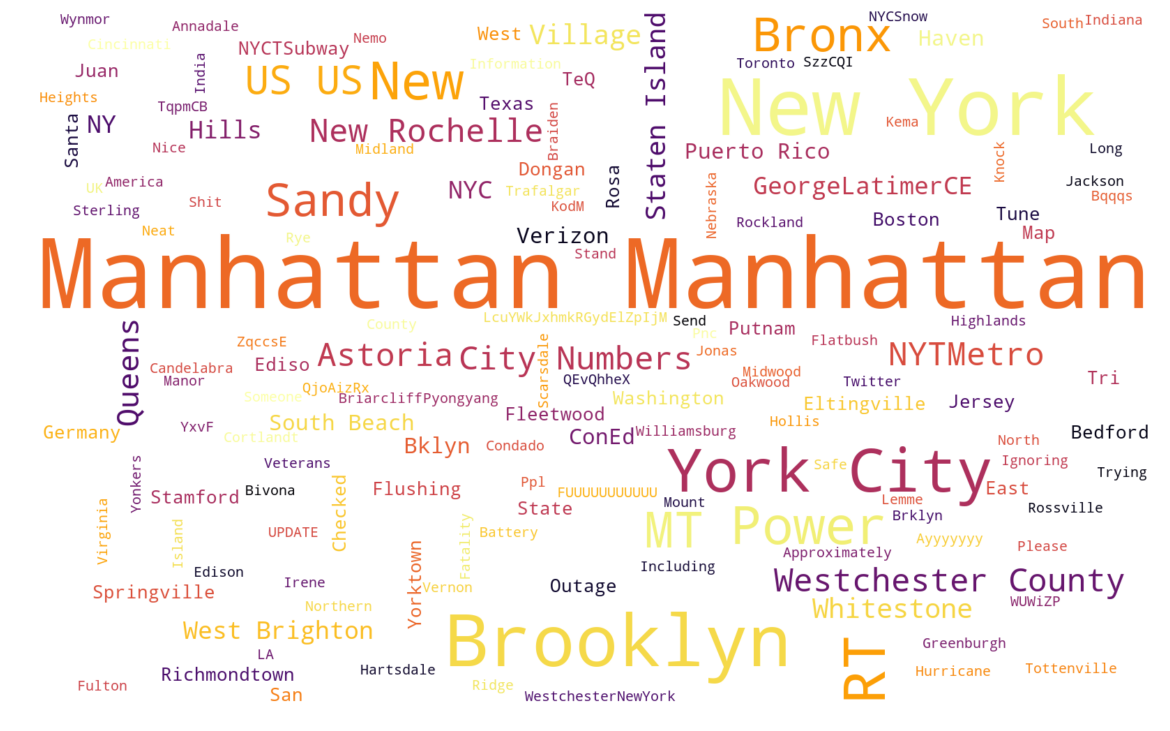

In [64]:
# returns a word cloud of GEOPOLITICAL ENTITIES 
GPE = df_without_notify_retweets.geopolitical_ents
GPE_string = []
# iterates over values assigned to notify_nyc
for i in GPE:
    GPE_string.append(i)
GPE_string = pd.Series(GPE).str.cat(sep=' ')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(width=1600, height=1000,
                      max_font_size=200,
                      colormap='inferno', 
                      background_color='white').generate(GPE_string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Extract Noun Phrase Chunks from Tweets

In [65]:
for tweet in df_without_notify_retweets.lemmed_tweet[:30]:
    #print(nlp(i))
    doc = nlp(tweet)
    NP = []
    for chunk in doc.noun_chunks:
        NP.append(str(chunk))   
    print(NP)

['upset power outage', 'Jango ConEd', 'get act']
['JonBurg', 'We', 'ConEd restoring power', 'outage', 'Not sure point']
['Voice mail', 'ConEd', 'Hey guy', 'I', 'AC', 'turn jackhammer']
['Neighborhood power outage Goddamn ConEd', 'rivington st']
['early power outage office']
['wnyc power outage morning', 'brianlehrer', 'week', 'pledge', 'ConEd']
['I', 'people', 'No power pm Losers']
['Hates power outage ConEd Thinking', 'car', 'whose alarm', 'alternative power source']
['RT NYCOEM ConEd', 'power outage', 'Marine Park neighborhood Brooklyn']
['Show', 'actual power outage', 'Oh ConEd LOVE']
['wtf', 'w conedison']
['RT NYCOEM Power outage College Point Malba section QN', 'loss service call ConEd CONED']
['Power outage ConEd', 'smart grid']
['LoHud ConEd Power outage', 'Costco Stew Leonard', 'accidental bCsBQ Full tvQzE']
['ConEd Power outage Costco Stew Leonard']
['ConEd Power outage Costco Stew Leonard accidental tinyurl zum']
['ConEd Power outage Costco Stew Leonard', 'r', 'u Qci']
['Con

###### Dependency Parsing
Future consideration: Can we use dependency parsing to get items like "Lighthouse Hill" that aren't recognized by Named-Entity-Recognition?

In [66]:
# from spacy import displacy

# nlp = spacy.load("en_core_web_sm")
# doc = nlp(df.lemmed_tweet[24])
# displacy.render(doc, style='dep')

## 5. Final Cleanup Before Merge

#### Match Twitter Timeframe to Weather Timeframe
Because we were unsure, at this point in the process, how we would merge the dataframes, we manually narrowed the Tweet dataframe to match the timeframe of our Weather dataframe. This would later prove to have been unnecessary, since we ended up merging the tweets onto the weather (which would have limited the timeframe to the weather timeframe anyway), but it did allow us to do some final exploration of the vocabulary that our model would ultimately be using.

In [67]:
df_without_notify_retweets.shape

(3219, 19)

In [68]:
# apply a mask to narrow the timeframe to span 10/1/2012 to 10/28/2017
# and name the new dataframe df_2012_2017
df_2012_2017 = df_without_notify_retweets[(df_without_notify_retweets.datetime >= '2012-10-01') & (df_without_notify_retweets.datetime <= '2017-10-28')]

In [69]:
# check the first element of datetime
min(df_2012_2017.datetime)

Timestamp('2012-10-01 00:56:33')

In [70]:
# check the last element of the datetime column
max(df_2012_2017.datetime)#

Timestamp('2017-10-24 12:21:52')

#### Match Twitter Datetime Format to Weather Datetime Format
In order to merge this dataframe onto the weather dataframe using datetime as the pairing key, the datetime elements have to match the format of the Weather dataframe, which has data for every hour. The simplest way to acheive this match was to remove the minutes and seconds from each datetime element in the Tweet dataset, effectively rounding the datetimes down to the nearest hour.

In [71]:
# set minute and second for each tweet to zero, using the method described at the cited link
# https://stackoverflow.com/questions/39805961/pandas-remove-seconds-from-datetime-index
df_2012_2017['datetime'] = df_2012_2017['datetime'].map(lambda x: x.replace(minute=0, second=0))

/Users/kevinc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
# uncomment to save to csv
#df_2012_2017.to_csv('./data/nlp_tweets_2012_2017.csv', index=False)

#### Final Visualization of Most Common Words in Final Narrowed Down Dataframe

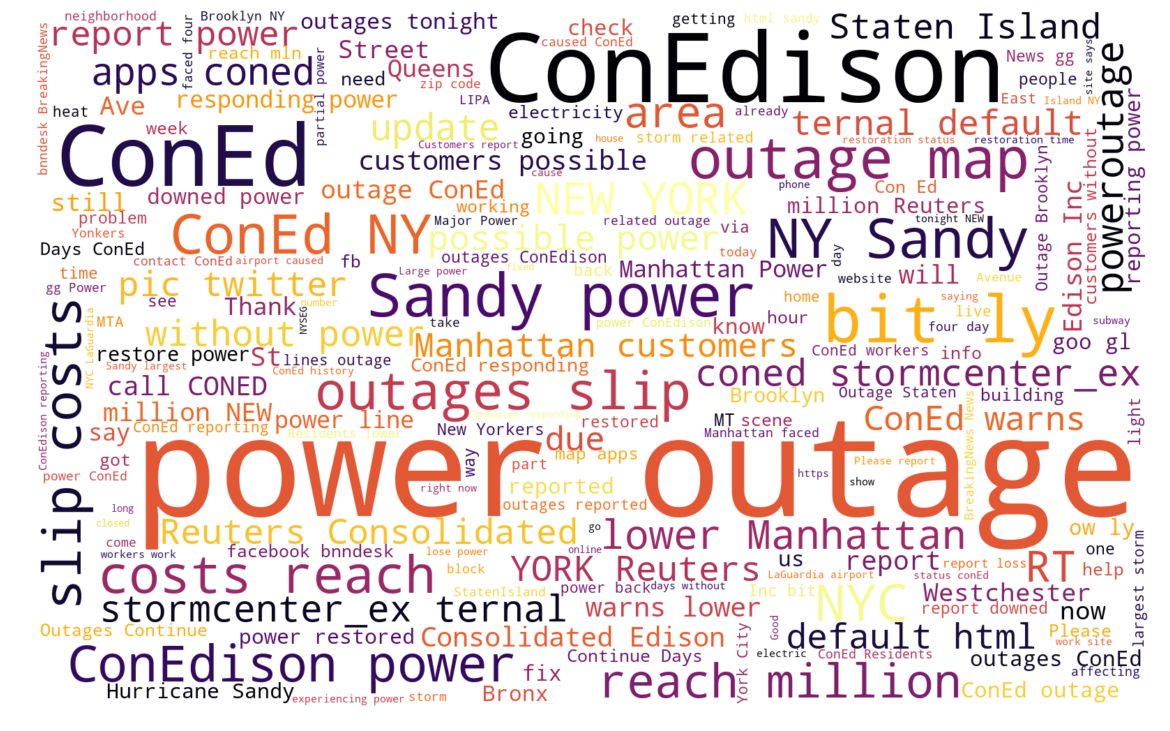

In [73]:
# returns a word cloud of text 
text = df_2012_2017.text
text_string = []
# iterates over values assigned to notify_nyc
for i in df_2012_2017.text:
    text_string.append(i)
NOUN_string = pd.Series(text).str.cat(sep=' ')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(width=1600, height=1000,
                      max_font_size=200,
                      colormap='inferno', 
                      background_color='white').generate(NOUN_string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

#### Final Visualization of Most Common Words Before and After Cleaning

In [74]:
from nltk.tokenize import RegexpTokenizer

In [75]:
# Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\b[^\d\W]+\b') # Regex here says to get full words but exclude digits

# Tokenize Tweets
dirty_tweet_tokens = [tokenizer.tokenize(token.lower().strip()) for token in df['text']]

# Initialize master list to populate
master_tweet_tokens = []

# For each dirty tweet, get list of clean tokens and append to master_tweet_tokens
for tweet in dirty_tweet_tokens:
    # Create template for clean tokens to populate for this particular tweet
    clean_tweet_tokens = []
    # For each word/token in tweet, make sure it is not a stopword or URL piece 
    for word in tweet:
        if ((word not in stopwords.words('english')) and (word not in ['http','https','www','com','@','...','…'])):
            # Now extract it into clean token list
            clean_tweet_tokens.append(word)
    # Append this list of tokens to the master list
    master_tweet_tokens.append(clean_tweet_tokens)

In [76]:
lst = master_tweet_tokens[0]
for sublist in master_tweet_tokens[1:]:
    lst.extend(sublist)

In [77]:
import nltk

In [78]:
fdist = nltk.FreqDist(lst)

In [79]:
common = fdist.most_common(20)

In [80]:
word_freq = []
for word, freq in common:
    #print(word)
    common_words = {}
    common_words['words'] = word
    common_words['freq'] = freq
    word_freq.append(common_words)

In [81]:
common_words = pd.DataFrame(word_freq)

/Users/kevinc/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


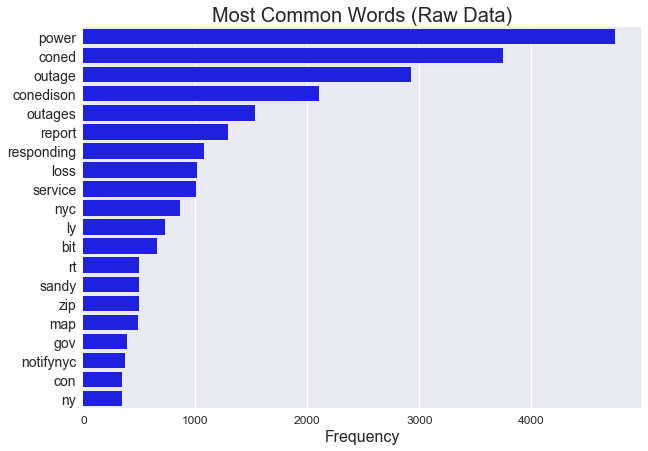

In [82]:
plt.figure(figsize=(10, 7))
sns.barplot(x = common_words['freq'],
            y = common_words['words'],  
            orient='h', color='b')
plt.title('Most Common Words (Raw Data)', fontsize=20)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks(fontsize=12);

In [83]:
# Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\b[^\d\W]+\b') # Regex here says to get full words but exclude digits

# Tokenizer Tweets
dirty_tweet_tokens = [tokenizer.tokenize(token.lower().strip()) for token in df_2012_2017['regex_clean_tweets']]

# Initialize master list to populate
master_tweet_tokens = []

# For each dirty tweet, get list of clean tokens and append to master_tweet_tokens
for tweet in dirty_tweet_tokens:
    # Create template for clean tokens to populate for this particular tweet
    clean_tweet_tokens = []
    # For each word/token in tweet, make sure it is not a stopword or URL piece or main search term 
    for word in tweet:
        if ((word not in stopwords.words('english')) and (word not in ['http','https','www','com','@','...','…', 'rt'])):
            # Now extract it into clean token list
            clean_tweet_tokens.append(word)
    # Append this list of tokens to the master list
    master_tweet_tokens.append(clean_tweet_tokens)

In [84]:
lst = master_tweet_tokens[0]
for sublist in master_tweet_tokens[1:]:
    lst.extend(sublist)

In [85]:
import nltk

In [86]:
fdist = nltk.FreqDist(lst)

In [87]:
common = fdist.most_common(20)

In [88]:
word_freq = []
for word, freq in common:
    #print(word)
    common_words = {}
    common_words['words'] = word
    common_words['freq'] = freq
    word_freq.append(common_words)

In [89]:
common_words = pd.DataFrame(word_freq)

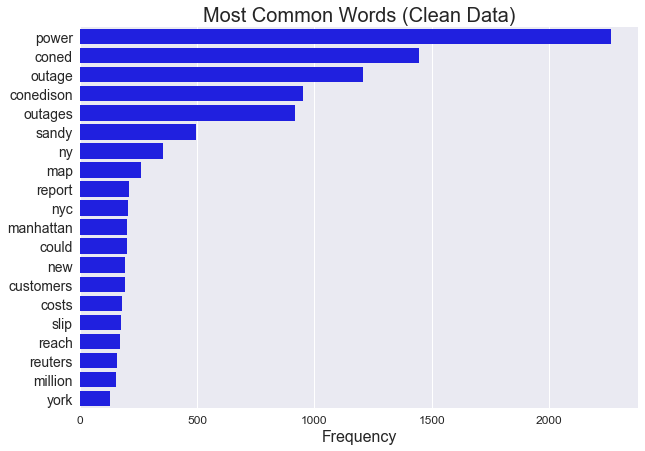

In [90]:
plt.figure(figsize=(10, 7))
sns.barplot(x = common_words['freq'],
            y = common_words['words'],  
            orient='h', color='b')
plt.title('Most Common Words (Clean Data)', fontsize=20)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks(fontsize=12);